In [161]:
from geometry import *

from shapely.ops import nearest_points
from sklearn.neighbors import NearestNeighbors
from scipy.ndimage import uniform_filter1d
import numpy as np
from math import ceil
from sklearn.cluster import DBSCAN
import warnings
warnings.filterwarnings('ignore')

### MRE Data: County and Place Data
Place boundaries represent locally dense urban areas. Boundaries will be used initally as a proxy for regional parcel density where adaptive eps will be calcualted. 

In [162]:
county1 = mPolygon(origin=(0,0), size=(25,25), alpha=0)

In [163]:
place1 = mPolygon(origin=(0, 0), size=(10, 10))
place2 = mPolygon(origin=(0, 12), size=(10, 10))
place3 = mPolygon(origin=(14, 5), size=(10, 10))
places = [place1, place2, place3]

place_data = {
    'Place': ['P1', 'P2', 'P3']
}
place_gdf = GeoDataFrame(place_data, places).build()
place_gdf

,Place,geometry
0,P1,"POLYGON ((0.00000 0.00000, 10.00000 0.00000, 1..."
1,P2,"POLYGON ((0.00000 12.00000, 10.00000 12.00000,..."
2,P3,"POLYGON ((14.00000 5.00000, 24.00000 5.00000, ..."


In [164]:
map = Map()

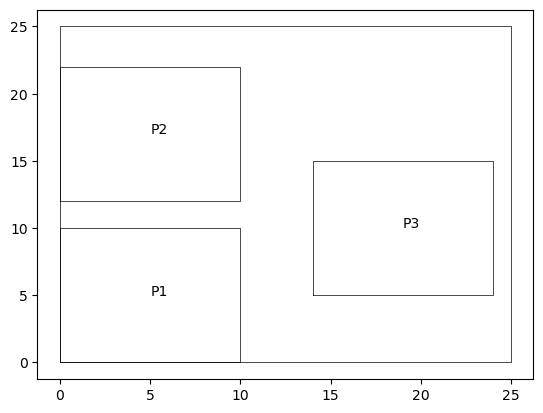

In [165]:
map.add_gdf(place_gdf, label='Place', alpha=0)
map.add_shape(county1)
map.plot()

### Places 1 Parcel Data

In [166]:
p1_1 = mPolygon(origin=(0, 0), size=(2,2))
p1_2 = mPolygon(origin=(0,2), size=(2,2))
p1_3 = mPolygon(origin=(0,4), size=(2,2))
p1_4 = mPolygon(origin=(0,6), size=(2,2))
p1_5 = mPolygon(origin=(0,8), size=(2,2))
p1_6 = mPolygon(origin=(2,0), size=(2,2))
p1_7 = mPolygon(origin=(2,2), size=(2,2))
p1_8 = mPolygon(origin=(2,4), size=(2,2))
p1_9 = mPolygon(origin=(2,6), size=(2,2))
p1_10 = mPolygon(origin=(2,8), size=(2,2))

p1_11 = mPolygon(origin=(6,0), size=(2,2))
p1_12 = mPolygon(origin=(6,2), size=(2,2))
p1_13 = mPolygon(origin=(6,4), size=(2,2))
p1_14 = mPolygon(origin=(6,6), size=(2,2))
p1_15 = mPolygon(origin=(6,8), size=(2,2))
p1_16 = mPolygon(origin=(8,0), size=(2,2))
p1_17 = mPolygon(origin=(8,2), size=(2,2))
p1_18 = mPolygon(origin=(8,4), size=(2,2))
p1_19 = mPolygon(origin=(8,6), size=(2,2))
p1_20 = mPolygon(origin=(8,8), size=(2,2))

p1_parcels = [p1_1, p1_2, p1_3, p1_4, p1_5, p1_6, p1_7, p1_8, p1_9, p1_10, p1_11, p1_12, p1_13, p1_14, p1_15, p1_16, p1_17, p1_18, p1_19, p1_20]

p1_parcel_data = {
    'OWNER': ['D', 'D', 'F', 'E', 'E', 'A', 'D', 'E', 'E', 'E', 'A', 'D', 'D', 'C', 'F', 'B', 'B', 'C', 'F', 'F']
}
p1_parcel_gdf = GeoDataFrame(p1_parcel_data, p1_parcels).build()

# add line to map
p1_line = mLine(coords=[(5, 0), (5, 10)], color='black')



In [167]:
map.add_gdf(p1_parcel_gdf, label='OWNER', alpha=0.2, color='blue')
map.add_shape(p1_line)

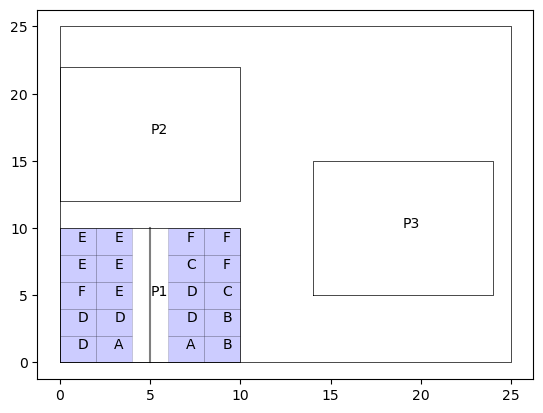

In [168]:
map.plot()

### Places 2 Parcel Data

In [169]:
p2_1 = mPolygon(origin=(0, 12), size=(2,2))
p2_2 = mPolygon(origin=(0,14), size=(2,2))
p2_3 = mPolygon(origin=(0,16), size=(2,2))
p2_4 = mPolygon(origin=(0,18), size=(2,2))
p2_5 = mPolygon(origin=(0,20), size=(2,2))
p2_6 = mPolygon(origin=(2,12), size=(2,2))
p2_7 = mPolygon(origin=(2,14), size=(2,2))
p2_8 = mPolygon(origin=(2,16), size=(2,2))
p2_9 = mPolygon(origin=(2,18), size=(2,2))
p2_10 = mPolygon(origin=(2,20), size=(2,2))

p2_11 = mPolygon(origin=(6,12), size=(2,2))
p2_12 = mPolygon(origin=(6,14), size=(2,2))
p2_13 = mPolygon(origin=(6,16), size=(2,2))
p2_14 = mPolygon(origin=(6,18), size=(2,2))
p2_15 = mPolygon(origin=(6,20), size=(2,2))
p2_16 = mPolygon(origin=(8,12), size=(2,2))
p2_17 = mPolygon(origin=(8,14), size=(2,2))
p2_18 = mPolygon(origin=(8,16), size=(2,2))
p2_19 = mPolygon(origin=(8,18), size=(2,2))
p2_20 = mPolygon(origin=(8,20), size=(2,2))


p2_parcels = [p2_1, p2_2, p2_3, p2_4, p2_5, p2_6, p2_7, p2_8, p2_9, p2_10, p2_11, p2_12, p2_13, p2_14, p2_15, p2_16, p2_17, p2_18, p2_19, p2_20]

p2_parcel_data = {
    'OWNER': ['E', 'C', 'C', 'C', 'E', 'E', 'B', 'F', 'A', 'D', 'F', 'F', 'C', 'C', 'C', 'F', 'G', 'H', 'I', 'J']
}
p2_parcel_gdf = GeoDataFrame(p2_parcel_data, p2_parcels).build()

# add line to map
p2_line = mLine(coords=[(5, 12), (5, 22)], color='black')


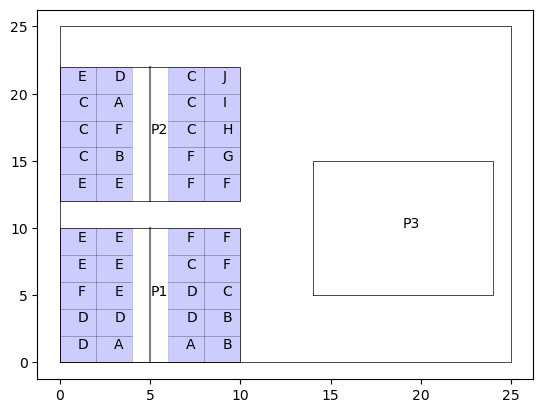

In [170]:
map.add_gdf(p2_parcel_gdf, label='OWNER', alpha=0.2, color='blue')
map.add_shape(p2_line)
map.plot()

### Place 3 Parcel Data

In [171]:
p3_p1 = mPolygon(origin=(14, 5), size=(2,2))
p3_p2 = mPolygon(origin=(14,7), size=(2,2))
p3_p3 = mPolygon(origin=(14,9), size=(2,2))
p3_p4 = mPolygon(origin=(14,11), size=(2,2))
p3_p5 = mPolygon(origin=(14,13), size=(2,2))
p3_p6 = mPolygon(origin=(16,5), size=(2,2))
p3_p7 = mPolygon(origin=(16,7), size=(2,2))
p3_p8 = mPolygon(origin=(16,9), size=(2,2))
p3_p9 = mPolygon(origin=(16,11), size=(2,2))
p3_p10 = mPolygon(origin=(16,13), size=(2,2))

p3_11 = mPolygon(origin=(20,5), size=(2,2))
p3_12 = mPolygon(origin=(20,7), size=(2,2))
p3_13 = mPolygon(origin=(20,9), size=(2,2))
p3_14 = mPolygon(origin=(20,11), size=(2,2))
p3_15 = mPolygon(origin=(20,13), size=(2,2))
p3_16 = mPolygon(origin=(22,5), size=(2,2))
p3_17 = mPolygon(origin=(22,7), size=(2,2))
p3_18 = mPolygon(origin=(22,9), size=(2,2))
p3_19 = mPolygon(origin=(22,11), size=(2,2))
p3_20 = mPolygon(origin=(22,13), size=(2,2))

# add line to map
p3_line = mLine(coords=[(19, 5), (19, 15)], color='black')

p3_parcels = [p3_p1, p3_p2, p3_p3, p3_p4, p3_p5, p3_p6, p3_p7, p3_p8, p3_p9, p3_p10, p3_11, p3_12, p3_13, p3_14, p3_15, p3_16, p3_17, p3_18, p3_19, p3_20]

p3_parcel_data = {
    'OWNER': ['F', 'F', 'F', 'F', 'F', 'C', 'C', 'C', 'B', 'B', 'C', 'C', 'C', 'C', 'C', 'D', 'D', 'D', 'D', 'D']
}
p3_parcel_gdf = GeoDataFrame(p3_parcel_data, p3_parcels).build()

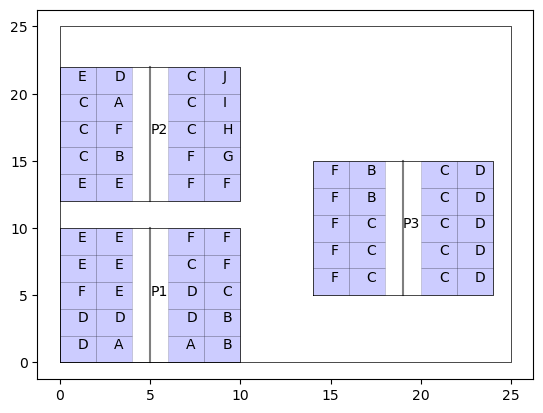

In [172]:
map.add_gdf(p3_parcel_gdf, label='OWNER', alpha=0.2, color='blue')
map.add_shape(p3_line)
map.plot()

### Clustering Workflow

In [173]:
def polygon_distance(polygon1, polygon2):
    # Calculate the minimum distance between two polygons
    point1, point2 = nearest_points(polygon1, polygon2)
    return point1.distance(point2)

def compute_distance_matrix(polygons):
    # Create a distance matrix between all polygons
    num_polygons = len(polygons)
    distance_matrix = np.zeros((num_polygons, num_polygons))
    
    for i in range(num_polygons):
        for j in range(i + 1, num_polygons):
            distance_matrix[i, j] = polygon_distance(polygons[i], polygons[j])
            distance_matrix[j, i] = distance_matrix[i, j]  # Symmetry
    
    return distance_matrix

In [174]:
parcels = pd.concat([p1_parcel_gdf, p2_parcel_gdf, p3_parcel_gdf], ignore_index=True)

display(parcels.head(3))

,OWNER,geometry
0,D,"POLYGON ((0.00000 0.00000, 2.00000 0.00000, 2...."
1,D,"POLYGON ((0.00000 2.00000, 2.00000 2.00000, 2...."
2,F,"POLYGON ((0.00000 4.00000, 2.00000 4.00000, 2...."


In [175]:
sample_size = 3
min_urban_distance = 2
max_distance = 5
n_ratio = 0.3
knn_max_neighbors = 5
all_clustered_parcel_data = gpd.GeoDataFrame()
all_single_parcel_data = gpd.GeoDataFrame()
for place_id, place_data in place_gdf.iterrows():
    print(f"Processing place {place_id}")
    sub_parcels = parcels[parcels.within(place_data['geometry'])]
    
    def compute_regional_distance_matrix(df):
        distance_matrix = df.geometry.apply(lambda g: df.distance(g)).values
        distances = distance_matrix[np.triu_indices_from(distance_matrix, k=1)]
        distances = distances[distances > 0]

        return distances

    distances = compute_regional_distance_matrix(sub_parcels)


    def compute_density(dmatrix, num_parcels):
        density = len(sub_parcels) / np.ptp(distances) 
        return density

    density = compute_density(distances, len(sub_parcels))
    
    def compute_nneighbors(density, num_parcels):
        # 10% of the data or 5 neighbors
        n_neighbors = min(int(num_parcels * density), num_parcels - 1)
        return n_neighbors

    n_neighbors = compute_nneighbors(density, len(sub_parcels))
    
    def compute_optimal_distance(dmatrix, n_neighbors, min_urban_distance, max_distance):
        knn = NearestNeighbors(n_neighbors=n_neighbors).fit(dmatrix.reshape(-1, 1))
        knn_distances, _ = knn.kneighbors(dmatrix.reshape(-1, 1))
        sorted_distances = np.sort(knn_distances[:, -1])
        smooth_dist = uniform_filter1d(sorted_distances, size=10)
        difference = np.diff(smooth_dist)
        elbow_index = np.argmax(difference) + 1

        # take distance from KNN elbow --> must be greater than min_urban_distance and less than max_distance
        knn_optimal_distance = smooth_dist[elbow_index]
        optimal_distance = min(max(ceil(knn_optimal_distance), min_urban_distance), max_distance)
        
        return optimal_distance, knn_optimal_distance

    optimal_distance, knn_optimal_distance = compute_optimal_distance(distances, n_neighbors, min_urban_distance, max_distance)
    
    print(f"Optimal distance for Place {place_id}: {optimal_distance}")
    
    
    unique_owners = sub_parcels['OWNER'].unique()
    clustered_parcel_data = gpd.GeoDataFrame()
    single_parcel_data = gpd.GeoDataFrame()
    for owner in unique_owners:
        owner_parcels = sub_parcels[sub_parcels['OWNER'] == owner]
        #print(f"Owner {owner} has {len(owner_parcels)} parcels")
        polygons = owner_parcels['geometry'].to_list()
        distance_matrix = compute_distance_matrix(polygons)
        if distance_matrix.shape[0] < 3: # only two parcels
            continue

        dbscan = DBSCAN(eps=optimal_distance, min_samples=sample_size, metric='precomputed')
        clusters = dbscan.fit_predict(distance_matrix)

        owner_parcels['cluster'] = clusters # clustert ID
        owner_parcels['area'] = owner_parcels['geometry'].area
        counts = owner_parcels['cluster'].value_counts() # pd.series of cluster counts
        
        outliers = counts[counts.index == -1].index # outliers always identified as -1
        counts = counts[counts.index != -1] # drop outliers

        single_parcel_filter_ids = set(list(outliers)) # not apart of any cluster
            
        single_parcel_filter = owner_parcels[owner_parcels['cluster'].isin(single_parcel_filter_ids)]
        single_parcel_data = pd.concat([single_parcel_data, single_parcel_filter], ignore_index=True)
        
        cluster_filter = owner_parcels[~owner_parcels['cluster'].isin(single_parcel_filter_ids)]
        if len(cluster_filter) > 0:
            cluster_filter['pcount'] = cluster_filter['cluster'].map(counts) # add parcel count to filter dataframe
            cluster_filter['knn_dst'] = knn_optimal_distance
            cluster_filter['opt_dst'] = optimal_distance # dbscan distane is euivalent to the required buffer distance
            cluster_filter['place_id'] = place_id
            clustered_parcel_data = pd.concat([clustered_parcel_data, cluster_filter], ignore_index=True)

    clustered_parcel_data['cluster_ID'] = clustered_parcel_data['OWNER'] + '_' + str(place_id) + '_' + clustered_parcel_data['cluster'].astype(str)
    all_clustered_parcel_data = pd.concat([all_clustered_parcel_data, clustered_parcel_data], ignore_index=True)
    all_single_parcel_data = pd.concat([all_single_parcel_data, single_parcel_data], ignore_index=True)

        

    

    print('________________________________________________________')
    

Processing place 0
Optimal distance for Place 0: 2
________________________________________________________
Processing place 1
Optimal distance for Place 1: 2
________________________________________________________
Processing place 2
Optimal distance for Place 2: 2
________________________________________________________


In [176]:
all_clustered_parcel_data.groupby(['OWNER', 'place_id']).agg(knn_dst=('knn_dst', 'first'), opt_dst=('opt_dst', 'first')).reset_index()

,OWNER,place_id,knn_dst,opt_dst
0,C,1,1.465938,2
1,C,2,1.465938,2
2,D,0,1.465938,2
3,D,2,1.465938,2
4,E,0,1.465938,2
5,F,0,1.465938,2
6,F,1,1.465938,2
7,F,2,1.465938,2


In [177]:
parcel_dissolve = all_clustered_parcel_data.dissolve(by='cluster_ID').reset_index()
parcel_dissolve

,cluster_ID,geometry,OWNER,cluster,area,pcount,knn_dst,opt_dst,place_id
0,C_1_0,"POLYGON ((2.00000 14.00000, 0.00000 14.00000, ...",C,0,4.0,3,1.465938,2,1
1,C_1_1,"POLYGON ((8.00000 16.00000, 6.00000 16.00000, ...",C,1,4.0,3,1.465938,2,1
2,C_2_0,"MULTIPOLYGON (((16.00000 5.00000, 16.00000 7.0...",C,0,4.0,8,1.465938,2,2
3,D_0_0,"MULTIPOLYGON (((0.00000 0.00000, 0.00000 2.000...",D,0,4.0,5,1.465938,2,0
4,D_2_0,"POLYGON ((22.00000 5.00000, 22.00000 7.00000, ...",D,0,4.0,5,1.465938,2,2
5,E_0_0,"POLYGON ((4.00000 4.00000, 2.00000 4.00000, 2....",E,0,4.0,5,1.465938,2,0
6,F_0_0,"POLYGON ((10.00000 6.00000, 8.00000 6.00000, 8...",F,0,4.0,3,1.465938,2,0
7,F_1_0,"MULTIPOLYGON (((6.00000 14.00000, 6.00000 16.0...",F,0,4.0,4,1.465938,2,1
8,F_2_0,"POLYGON ((14.00000 5.00000, 14.00000 7.00000, ...",F,0,4.0,5,1.465938,2,2


In [178]:
parcel_dissolve['geometry'] = parcel_dissolve['geometry'].buffer(3)
parcel_dissolve['geometry'] = parcel_dissolve['geometry'].buffer(-3)
parcel_dissolve = parcel_dissolve.explode(index_parts=True)


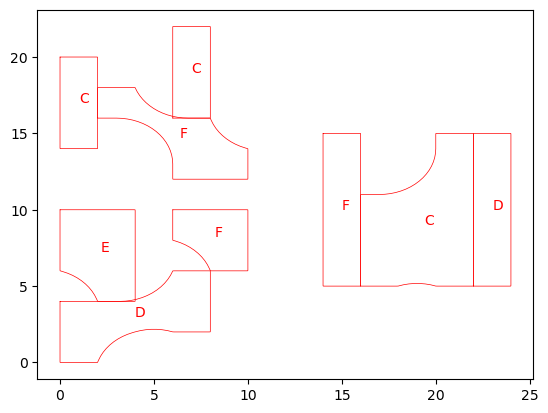

In [179]:
cluster_map = Map()
cluster_map.add_gdf(parcel_dissolve, alpha=0, edgecolor='red', label='OWNER', label_color='red')
cluster_map.plot()

In [180]:
map.add_gdf(parcel_dissolve, alpha=0, edgecolor='red', label='OWNER', label_color='red')

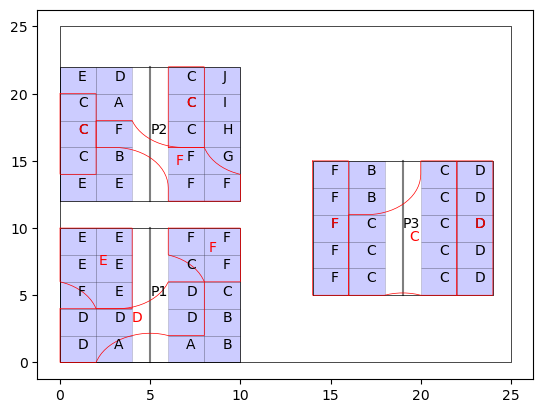

In [181]:
map.plot()